# Properties of Financial and Macroeconomic Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm

# 1. Simple Return Time Series

In this section, I performed simple statistical analysis using daily returns data of Apple. I calculated the sample mean $\hat{\mu}$, standard deviation $\hat{\sigma}$, and first-order autocorrelation coefficient $\hat{\rho}(1)$ for daily simple returns over the entire sample period.

In [2]:
# read apple data
apple = pd.read_csv("AAPL.csv",parse_dates=True,index_col=0)

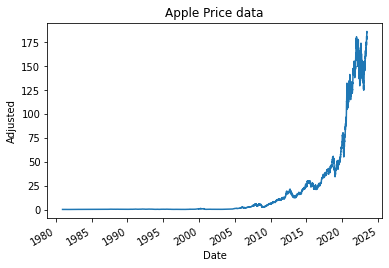

In [3]:
# plot the stock price
apple['Adj Close'].plot();
plt.xlabel("Date");
plt.ylabel("Adjusted");
plt.title("Apple Price data");

In [4]:
# calculate the daily and monthly returns
apple_daily_returns = apple["Adj Close"].pct_change()
apple_monthly_returns = apple['Adj Close'].resample("M").ffill().pct_change()

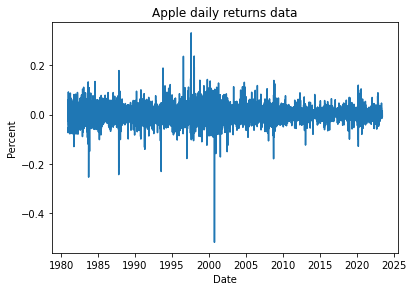

In [5]:
# plot the daily return
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(apple_daily_returns);
ax1.set_xlabel("Date");
ax1.set_ylabel("Percent");
ax1.set_title("Apple daily returns data");

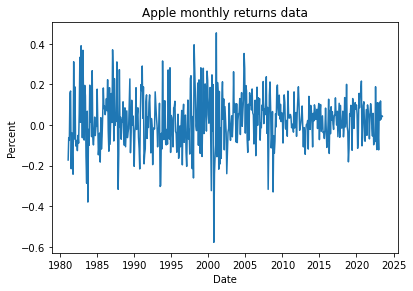

In [6]:
# plot the monthly return
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(apple_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Apple monthly returns data")
plt.show()

I first compute the sample mean, standard deviation, and first-order autocorrelation coefficient for daily simple returns over the entire sample period for Apple stock. Then I split the Apple price data into four equal subperiods and compute the same statistics in each subperiod.

In [7]:
# create a dataframe to summarize the results
d = {"Sample Name":["Whole Period","Sub-Period 1","Sub-Period 2","Sub-Period 3","Sub-Period 4"],
     "Sample Mean":[0]*5,
     "Standard Deviation":[0]*5,
     "First-Order Autocorrelation Coefficient":[0]*5}
df = pd.DataFrame(data=d)
df.set_index("Sample Name",inplace=True)

# calculate the sample mean for the entire period
df.loc["Whole Period","Sample Mean"] = apple_daily_returns.sum()/apple_daily_returns.size
# calculate the standard deviation for the whole period
df.loc["Whole Period","Standard Deviation"] = np.std(apple_daily_returns)
# calculate the first order auto-correlation coefficient
df.loc["Whole Period","First-Order Autocorrelation Coefficient"] = np.corrcoef(apple_daily_returns[1:-1],apple_daily_returns[2:])[0,1]

In [8]:
# calculate the amount of rows for each sample period
period_length = np.floor(apple.shape[0]/4)
period_length = period_length.astype(int)
# sub-period 1
apple_1 = apple.iloc[:period_length,:]
apple_1_daily_returns = apple_1["Adj Close"].pct_change()

In [9]:
# calculate the sample mean for the sub-period 1
df.loc["Sub-Period 1","Sample Mean"] = apple_1_daily_returns.sum()/apple_1_daily_returns.size
# calculate the standard deviation for the sub-period 1
df.loc["Sub-Period 1","Standard Deviation"] = np.std(apple_1_daily_returns)
# calculate the first order auto-correlation coefficient for the sub-period 1
df.loc["Sub-Period 1","First-Order Autocorrelation Coefficient"] = np.corrcoef(apple_1_daily_returns[1:-1],apple_1_daily_returns[2:])[0,1]

In [10]:
# sub-period 2
apple_2 = apple.iloc[period_length:2*period_length,:]
apple_2_daily_returns = apple_2["Adj Close"].pct_change()

In [11]:
# calculate the sample mean for the sub-period 2
df.loc["Sub-Period 2", "Sample Mean"] = apple_2_daily_returns.sum()/apple_2_daily_returns.size
# calculate the standard deviation for the sub-period 2
df.loc["Sub-Period 2","Standard Deviation"] = np.std(apple_2_daily_returns)
# calculate the first order auto-correlation coefficient for the sub-period 2
df.loc["Sub-Period 2","First-Order Autocorrelation Coefficient"] = np.corrcoef(apple_2_daily_returns[1:-1],apple_2_daily_returns[2:])[0,1]

In [12]:
# sub-period 3
apple_3 = apple.iloc[2*period_length:3*period_length,:]
apple_3_daily_returns = apple_3["Adj Close"].pct_change()

In [13]:
# calculate the sample mean for the sub-period 3
df.loc["Sub-Period 3", "Sample Mean"] = apple_3_daily_returns.sum()/apple_3_daily_returns.size
# calculate the sample mean for the sub-period 3
df.loc["Sub-Period 3", "Standard Deviation"] = np.std(apple_3_daily_returns)
# calculate the first order auto-correlation coefficient for the sub-period 3
df.loc["Sub-Period 3","First-Order Autocorrelation Coefficient"] = np.corrcoef(apple_3_daily_returns[1:-1],apple_3_daily_returns[2:])[0,1]

In [14]:
# sub-period 4
apple_4 = apple.iloc[3*period_length:,:]
apple_4_daily_returns = apple_4["Adj Close"].pct_change()

In [15]:
# calculate the sample mean for the sub-period 4
df.loc["Sub-Period 4", "Sample Mean"] = apple_4_daily_returns.sum()/apple_4_daily_returns.size
# calculate the standard deviation for the sub-period 4
df.loc["Sub-Period 4","Standard Deviation"] = np.std(apple_4_daily_returns)
# calculate the first order auto-correlation coefficient for the sub-period 4
df.loc["Sub-Period 4","First-Order Autocorrelation Coefficient"] = np.corrcoef(apple_4_daily_returns[1:-1],apple_4_daily_returns[2:])[0,1]

In [16]:
df

,Sample Mean,Standard Deviation,First-Order Autocorrelation Coefficient
Sample Name,,,
Whole Period,0.001106,0.028164,0.016364
Sub-Period 1,0.000929,0.031130,0.107088
Sub-Period 2,0.000702,0.035785,-0.024875
Sub-Period 3,0.001784,0.024281,0.000290
Sub-Period 4,0.001024,0.018253,-0.060771


Next, I will plot the autocorrelation function with lags on the horizontal and the correlations on vertical axis.

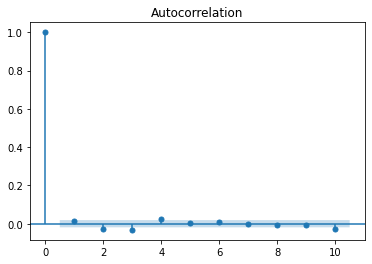

In [17]:
# whole period
sm.graphics.tsa.plot_acf(apple_daily_returns[1:],lags=10,alpha=0.05);

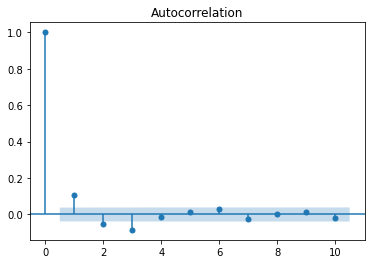

In [18]:
# sub-period 1
sm.graphics.tsa.plot_acf(apple_1_daily_returns[1:],lags=10,alpha=0.05);

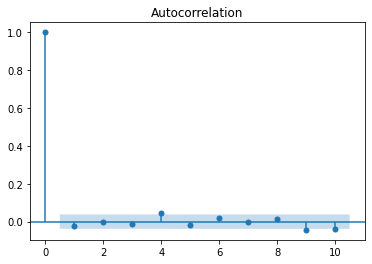

In [19]:
# sub-period 2
sm.graphics.tsa.plot_acf(apple_2_daily_returns[1:],lags=10,alpha=0.05);

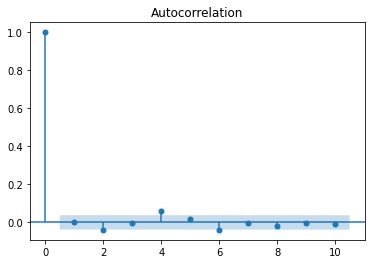

In [20]:
# sub-period 3
sm.graphics.tsa.plot_acf(apple_3_daily_returns[1:],lags=10,alpha=0.05);

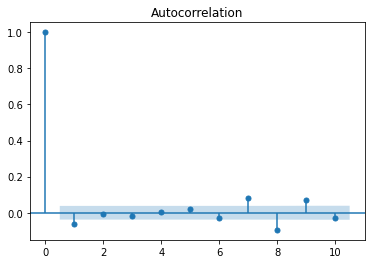

In [21]:
# sub-period 4
sm.graphics.tsa.plot_acf(apple_4_daily_returns[1:],lags=10,alpha=0.05);

From the above analysis, we noticed that for the Apple stock, its sample mean, standard deviation, and first-order autocorrelation coefficient for daily simple returns are stable over time.

# 2. Log Return Time Series

The natural logarithm of the simple gross return of an asset is called the continuously compounded return or log return.

/Users/xiangyuli/opt/anaconda3/envs/venv/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


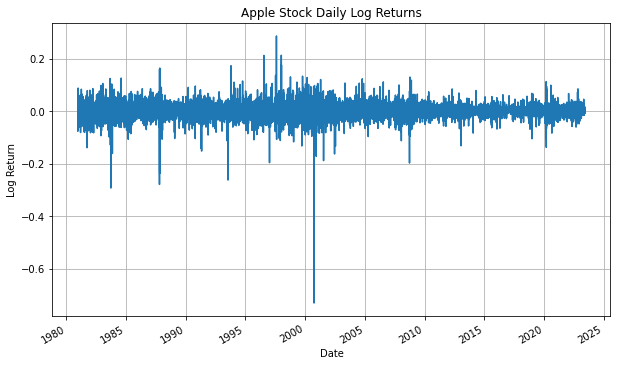

In [22]:
# calculate the whole period log return
apple_daily_log_return = np.log(apple['Adj Close']/apple['Adj Close'].shift(1))

# plot the log returns
plt.figure(figsize=(10,6))
apple_daily_log_return.plot();
plt.xlabel('Date');
plt.ylabel('Log Return')
plt.title('Apple Stock Daily Log Returns')
plt.grid(True)
plt.show()

In [23]:
# create a dataframe to summarize the results
d = {"Sample Name":["Whole Period","Sub-Period 1","Sub-Period 2","Sub-Period 3","Sub-Period 4"],
     "Sample Mean":[0]*5,
     "Standard Deviation":[0]*5,
     "First-Order Autocorrelation Coefficient":[0]*5}
df = pd.DataFrame(data=d)
df.set_index("Sample Name",inplace=True)

In [24]:
# calculate the sample mean for the entire period
df.loc["Whole Period","Sample Mean"] = apple_daily_log_return.sum()/apple_daily_log_return.size
# calculate the standard deviation for the whole period
df.loc["Whole Period","Standard Deviation"] = np.std(apple_daily_log_return)
# calculate the first order auto-correlation coefficient
df.loc["Whole Period","First-Order Autocorrelation Coefficient"] = np.corrcoef(apple_daily_log_return[1:-1],apple_daily_log_return[2:])[0,1]

In [25]:
# sub-period 1
apple_1_daily_log_return = np.log(1+apple_1_daily_returns)
# calculate the sample mean for the sub-period 1
df.loc["Sub-Period 1","Sample Mean"] = apple_1_daily_log_return.sum()/apple_1_daily_returns.size
# calculate the standard deviation for the sub-period 1
df.loc["Sub-Period 1","Standard Deviation"] = np.std(apple_1_daily_log_return)
# calculate the first order auto-correlation coefficient for the sub-period 1
df.loc["Sub-Period 1","First-Order Autocorrelation Coefficient"] = np.corrcoef(apple_1_daily_log_return[1:-1],apple_1_daily_log_return[2:])[0,1]

/Users/xiangyuli/opt/anaconda3/envs/venv/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
# sub-period 2
apple_2_daily_log_return = np.log(1+apple_2_daily_returns)
# calculate the sample mean for the sub-period 1
df.loc["Sub-Period 2","Sample Mean"] = apple_2_daily_log_return.sum()/apple_2_daily_returns.size
# calculate the standard deviation for the sub-period 1
df.loc["Sub-Period 2","Standard Deviation"] = np.std(apple_2_daily_log_return)
# calculate the first order auto-correlation coefficient for the sub-period 1
df.loc["Sub-Period 2","First-Order Autocorrelation Coefficient"] = np.corrcoef(apple_2_daily_log_return[1:-1],apple_2_daily_log_return[2:])[0,1]

In [27]:
# sub-period 3
apple_3_daily_log_return = np.log(1+apple_3_daily_returns)
# calculate the sample mean for the sub-period 1
df.loc["Sub-Period 3","Sample Mean"] = apple_3_daily_log_return.sum()/apple_3_daily_returns.size
# calculate the standard deviation for the sub-period 1
df.loc["Sub-Period 3","Standard Deviation"] = np.std(apple_3_daily_log_return)
# calculate the first order auto-correlation coefficient for the sub-period 1
df.loc["Sub-Period 3","First-Order Autocorrelation Coefficient"] = np.corrcoef(apple_3_daily_log_return[1:-1],apple_3_daily_log_return[2:])[0,1]

In [28]:
# sub-period 4
apple_4_daily_log_return = np.log(1+apple_4_daily_returns)
# calculate the sample mean for the sub-period 1
df.loc["Sub-Period 4","Sample Mean"] = apple_4_daily_log_return.sum()/apple_4_daily_returns.size
# calculate the standard deviation for the sub-period 1
df.loc["Sub-Period 4","Standard Deviation"] = np.std(apple_4_daily_log_return)
# calculate the first order auto-correlation coefficient for the sub-period 1
df.loc["Sub-Period 4","First-Order Autocorrelation Coefficient"] = np.corrcoef(apple_4_daily_log_return[1:-1],apple_4_daily_log_return[2:])[0,1]

In [29]:
df

,Sample Mean,Standard Deviation,First-Order Autocorrelation Coefficient
Sample Name,,,
Whole Period,0.000702,0.028590,0.015560
Sub-Period 1,0.000440,0.031384,0.105143
Sub-Period 2,0.000039,0.036890,-0.024755
Sub-Period 3,0.001489,0.024260,0.000451
Sub-Period 4,0.000857,0.018278,-0.059342


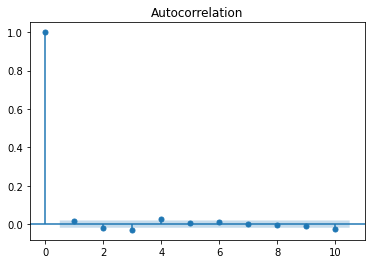

In [30]:
# whole period
sm.graphics.tsa.plot_acf(apple_daily_log_return[1:],lags=10,alpha=0.05);

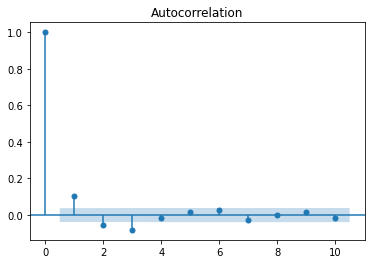

In [31]:
# sub-period 1
sm.graphics.tsa.plot_acf(apple_1_daily_log_return[1:],lags=10,alpha=0.05);

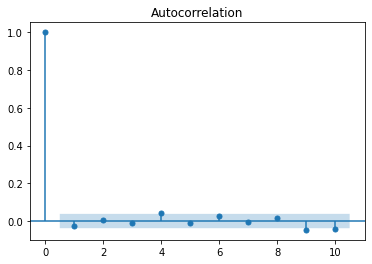

In [32]:
# sub-period 2
sm.graphics.tsa.plot_acf(apple_2_daily_log_return[1:],lags=10,alpha=0.05);

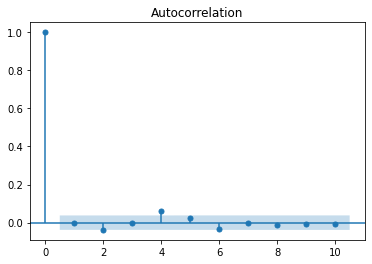

In [33]:
# sub-period 3
sm.graphics.tsa.plot_acf(apple_3_daily_log_return[1:],lags=10,alpha=0.05);

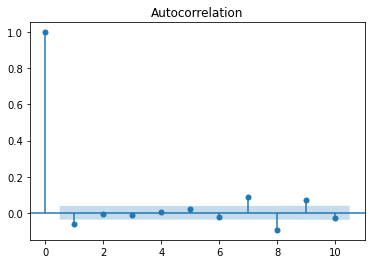

In [34]:
# sub-period 4
sm.graphics.tsa.plot_acf(apple_4_daily_log_return[1:],lags=10,alpha=0.05);

# 3. Confidence Intervals of Apple Stock

In [35]:
# construct 99% confidence interval for sample mean of log return for Apple
# for whole period
A_left = df.loc[df.index[0],"Sample Mean"] - norm.ppf(0.995)*df.loc[df.index[0],"Standard Deviation"]/np.sqrt(apple_daily_log_return.size)
A_right = df.loc[df.index[0],"Sample Mean"] + norm.ppf(0.995)*df.loc[df.index[0],"Standard Deviation"]/np.sqrt(apple_daily_log_return.size)
print(f"99% Confidence Interval for Apple's Whole period log return: [{A_left:.5f},{A_right:.5f}]")

99% Confidence Interval for Apple's Whole period log return: [-0.00001,0.00141]


In [36]:
# for subperiod 1
A_left = df.loc[df.index[1],"Sample Mean"] - norm.ppf(0.995)*df.loc[df.index[1],"Standard Deviation"]/np.sqrt(apple_1_daily_returns.size)
A_right = df.loc[df.index[1],"Sample Mean"] + norm.ppf(0.995)*df.loc[df.index[1],"Standard Deviation"]/np.sqrt(apple_1_daily_returns.size)
print(f"99% Confidence Interval for Apple's Sub-Period 1 log return: [{A_left:.5f},{A_right:.5f}]")

99% Confidence Interval for Apple's Sub-Period 1 log return: [-0.00112,0.00200]


In [37]:
# for subperiod 2
A_left = df.loc[df.index[2],"Sample Mean"] - norm.ppf(0.995)*df.loc[df.index[2],"Standard Deviation"]/np.sqrt(apple_2_daily_returns.size)
A_right = df.loc[df.index[2],"Sample Mean"] + norm.ppf(0.995)*df.loc[df.index[2],"Standard Deviation"]/np.sqrt(apple_2_daily_returns.size)
print(f"99% Confidence Interval for Apple's Sub-Period 2 log return: [{A_left:.5f},{A_right:.5f}]")

99% Confidence Interval for Apple's Sub-Period 2 log return: [-0.00180,0.00188]


In [38]:
# for subperiod 3
A_left = df.loc[df.index[3],"Sample Mean"] - norm.ppf(0.995)*df.loc[df.index[3],"Standard Deviation"]/np.sqrt(apple_3_daily_returns.size)
A_right = df.loc[df.index[3],"Sample Mean"] + norm.ppf(0.995)*df.loc[df.index[3],"Standard Deviation"]/np.sqrt(apple_3_daily_returns.size)
print(f"99% Confidence Interval for Apple's Sub-Period 3 log return: [{A_left:.5f},{A_right:.5f}]")

99% Confidence Interval for Apple's Sub-Period 3 log return: [0.00028,0.00270]


In [39]:
# for subperiod 4
A_left = df.loc[df.index[4],"Sample Mean"] - norm.ppf(0.995)*df.loc[df.index[4],"Standard Deviation"]/np.sqrt(apple_4_daily_returns.size)
A_right = df.loc[df.index[4],"Sample Mean"] + norm.ppf(0.995)*df.loc[df.index[4],"Standard Deviation"]/np.sqrt(apple_4_daily_returns.size)
print(f"99% Confidence Interval for Apple's Sub-Period 4 log return: [{A_left:.5f},{A_right:.5f}]")

99% Confidence Interval for Apple's Sub-Period 4 log return: [-0.00005,0.00177]


# 4. Skewness, Kurtosis, and Studentized Range Estimate

In [40]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [41]:
# for whole period
print(f"Skewness for Whole Period: {skew(apple_daily_log_return[1:]):.5f}")
print(f"Kurtosis for Whole Period: {kurtosis(apple_daily_log_return[1:]):.5f}")
sr0 = (max(apple_daily_log_return[1:])-min(apple_daily_log_return[1:]))/df.loc[df.index[0],"Standard Deviation"]
print(f"Studentized Range of Daily Log Returns for Whole Period: {sr0:.5f}")

Skewness for Whole Period: -1.73876
Kurtosis for Whole Period: 47.00493
Studentized Range of Daily Log Returns for Whole Period: 35.61217


In [42]:
# for subperiod 1
print(f"Skewness for Sub-Period 1: {skew(apple_1_daily_log_return[1:]):.5f}")
print(f"Kurtosis for Sub-Period 1: {kurtosis(apple_1_daily_log_return[1:]):.5f}")
sr1 = (max(apple_1_daily_log_return[1:])-min(apple_1_daily_log_return[1:]))/df.loc[df.index[1],"Standard Deviation"]
print(f"Studentized Range of Daily Log Returns for Sub-Period 1: {sr1:.5f}")

Skewness for Sub-Period 1: -0.71868
Kurtosis for Sub-Period 1: 7.81834
Studentized Range of Daily Log Returns for Sub-Period 1: 14.58017


In [43]:
# for subperiod 2
print(f"Skewness for Sub-Period 2: {skew(apple_2_daily_log_return[1:]):.5f}")
print(f"Kurtosis for Sub-Period 2: {kurtosis(apple_2_daily_log_return[1:]):.5f}")
sr1 = (max(apple_2_daily_log_return[1:])-min(apple_2_daily_log_return[1:]))/df.loc[df.index[2],"Standard Deviation"]
print(f"Studentized Range of Daily Log Returns for Sub-Period 2: {sr1:.5f}")

Skewness for Sub-Period 2: -2.67262
Kurtosis for Sub-Period 2: 61.33094
Studentized Range of Daily Log Returns for Sub-Period 2: 27.59915


In [44]:
# for subperiod 3
print(f"Skewness for Sub-Period 3: {skew(apple_3_daily_log_return[1:]):.5f}")
print(f"Kurtosis for Sub-Period 3: {kurtosis(apple_3_daily_log_return[1:]):.5f}")
sr1 = (max(apple_3_daily_log_return[1:])-min(apple_3_daily_log_return[1:]))/df.loc[df.index[3],"Standard Deviation"]
print(f"Studentized Range of Daily Log Returns for Sub-Period 3: {sr1:.5f}")

Skewness for Sub-Period 3: -0.15482
Kurtosis for Sub-Period 3: 4.74907
Studentized Range of Daily Log Returns for Sub-Period 3: 13.50619


In [45]:
# for subperiod 4
print(f"Skewness for Sub-Period 4: {skew(apple_4_daily_log_return[1:]):.5f}")
print(f"Kurtosis for Sub-Period 4: {kurtosis(apple_4_daily_log_return[1:]):.5f}")
sr1 = (max(apple_4_daily_log_return[1:])-min(apple_4_daily_log_return[1:]))/df.loc[df.index[4],"Standard Deviation"]
print(f"Studentized Range of Daily Log Returns for Sub-Period 4: {sr1:.5f}")

Skewness for Sub-Period 4: -0.33383
Kurtosis for Sub-Period 4: 5.89877
Studentized Range of Daily Log Returns for Sub-Period 4: 13.72487


# 5. Test the Random Walk Hypothesis

## 5.1 Autocorrelation Coefficient Test

In a random walk, you should typically observe significant autocorrelation at lag 1 (positive correlation) and a gradual decline in significance as the lag increases. The autocorrelation at lag 1 arises from the tendency of consecutive observations to be positively correlated, which is a characteristic of random walks.

In contrast, if the ACF values exhibit a more complex pattern or decay rapidly, it may suggest that the data does not follow a random walk.

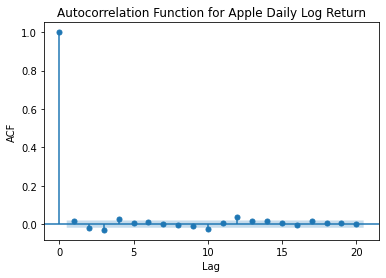

In [46]:
sm.graphics.tsa.plot_acf(apple_daily_log_return[1:], lags=20);
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function for Apple Daily Log Return')
plt.show()

Apple daily return ttime series has no significant correlation at lag 1, thus Apple daily return is not Random Walk.

## 5.2 Portmanteau Test

The Portmanteau test, specifically the Ljung-Box test or the Box-Pierce test, can be used to test the random walk hypothesis in the context of time series analysis. Calculate the statistic for various lags up to a certain maximum lag value. Compare the calculated Ljung-Box statistic to the chi-squared distribution with degrees of freedom equal to the number of lags being tested. 

In [47]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Calculate the Ljung-Box test statistic and p-values
acorr_ljungbox(apple_daily_log_return[1:], lags=20, return_df=True)

,lb_stat,lb_pvalue
1,2.594485,0.107236
2,7.133298,0.028250
3,16.988423,0.000711
4,24.166669,0.000074
5,24.630542,0.000164
6,25.836377,0.000239
7,25.840774,0.000538
8,26.062110,0.001025
9,26.725382,0.001553
10,32.712645,0.000304


We reject the null hypothesis that autocorrelation is present starting from lag 2.

## 5.3 Variance Ratio Test

The Variance Ratio test is a statistical test used to assess whether a financial time series follows a random walk. The test involves calculating a test statistic that compares the variance of returns over different lags. It typically involves dividing the variance of returns over a longer time horizon by the variance over a shorter time horizon.

In [48]:
# Define the number of lags for the test (e.g., 1, 2, 3, ...)
num_lags = 20
# Calculate the Variance Ratio manually
squared_returns = apple_daily_log_return[1:] ** 2
vr = np.var(squared_returns[num_lags:]) / (num_lags * np.var(squared_returns[:-num_lags]))

# Calculate the p-value using statistical tests (e.g., chi-squared test)
from scipy.stats import chi2

n = len(apple_daily_log_return[1:])
p_value = 1 - chi2.cdf(n * (n - 1) * (2 * n + 5) * vr / (6 * (n - 2)), df=1)

print(f"Variance Ratio: {vr:.2f}")
print(f"P-Value: {p_value:.2f}")

Variance Ratio: 0.05
P-Value: 0.00
